# Context
Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. Let's look at our data.



# Content

#### Columns

1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance

#### Import Pyforest to minimize the hazel of loading important libraries

In [1]:
from pyforest import *

#### Loading dataset and doing priliminary analysis

In [15]:
df=pd.read_csv('Insurance.csv')
df.head()

<IPython.core.display.Javascript object>

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### observation: Dataset consists of 3 categorical variables and 4 numeric including target variable

In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### observation: Dataset consists wide spread of data mostly right skewed with 1338 observations and 7 attributes

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### No null values to handle

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

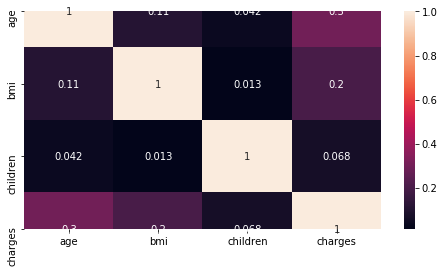

In [18]:
plt.subplots(figsize=(8,4))
sns.heatmap(df.corr(), annot=True)

#### Inference: As per heat map there is no much correlation between independent numeric variable and target variables. Must investogate further by encoding categorical variables.

In [17]:
data=df.select_dtypes(include='object')
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print()

sex
male      676
female    662
Name: sex, dtype: int64

smoker
no     1064
yes     274
Name: smoker, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



### Let's derive some insights from categorical features with target 

<IPython.core.display.Javascript object>

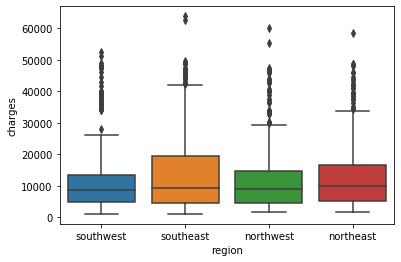

In [19]:
sns.boxplot(df.region, df.charges)

#### Inference: The means of the regions are almost same, with non linear relationship with target variable

### Inference: As we can determine, there are only 2 levels in Age and Smoking category where in dummy values can be created. For region category, label encoding might hinder the regression model. Lets create dummies for the variables

In [20]:
df= pd.get_dummies(df, drop_first=True)
df.head()

<IPython.core.display.Javascript object>

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [21]:
df.corr()['charges'].sort_values()

region_southwest   -0.043210
region_northwest   -0.039905
sex_male            0.057292
children            0.067998
region_southeast    0.073982
bmi                 0.198341
age                 0.299008
smoker_yes          0.787251
charges             1.000000
Name: charges, dtype: float64

### Inference: We can see significant relation between smokers and their insurance charges which is obvious.

<IPython.core.display.Javascript object>

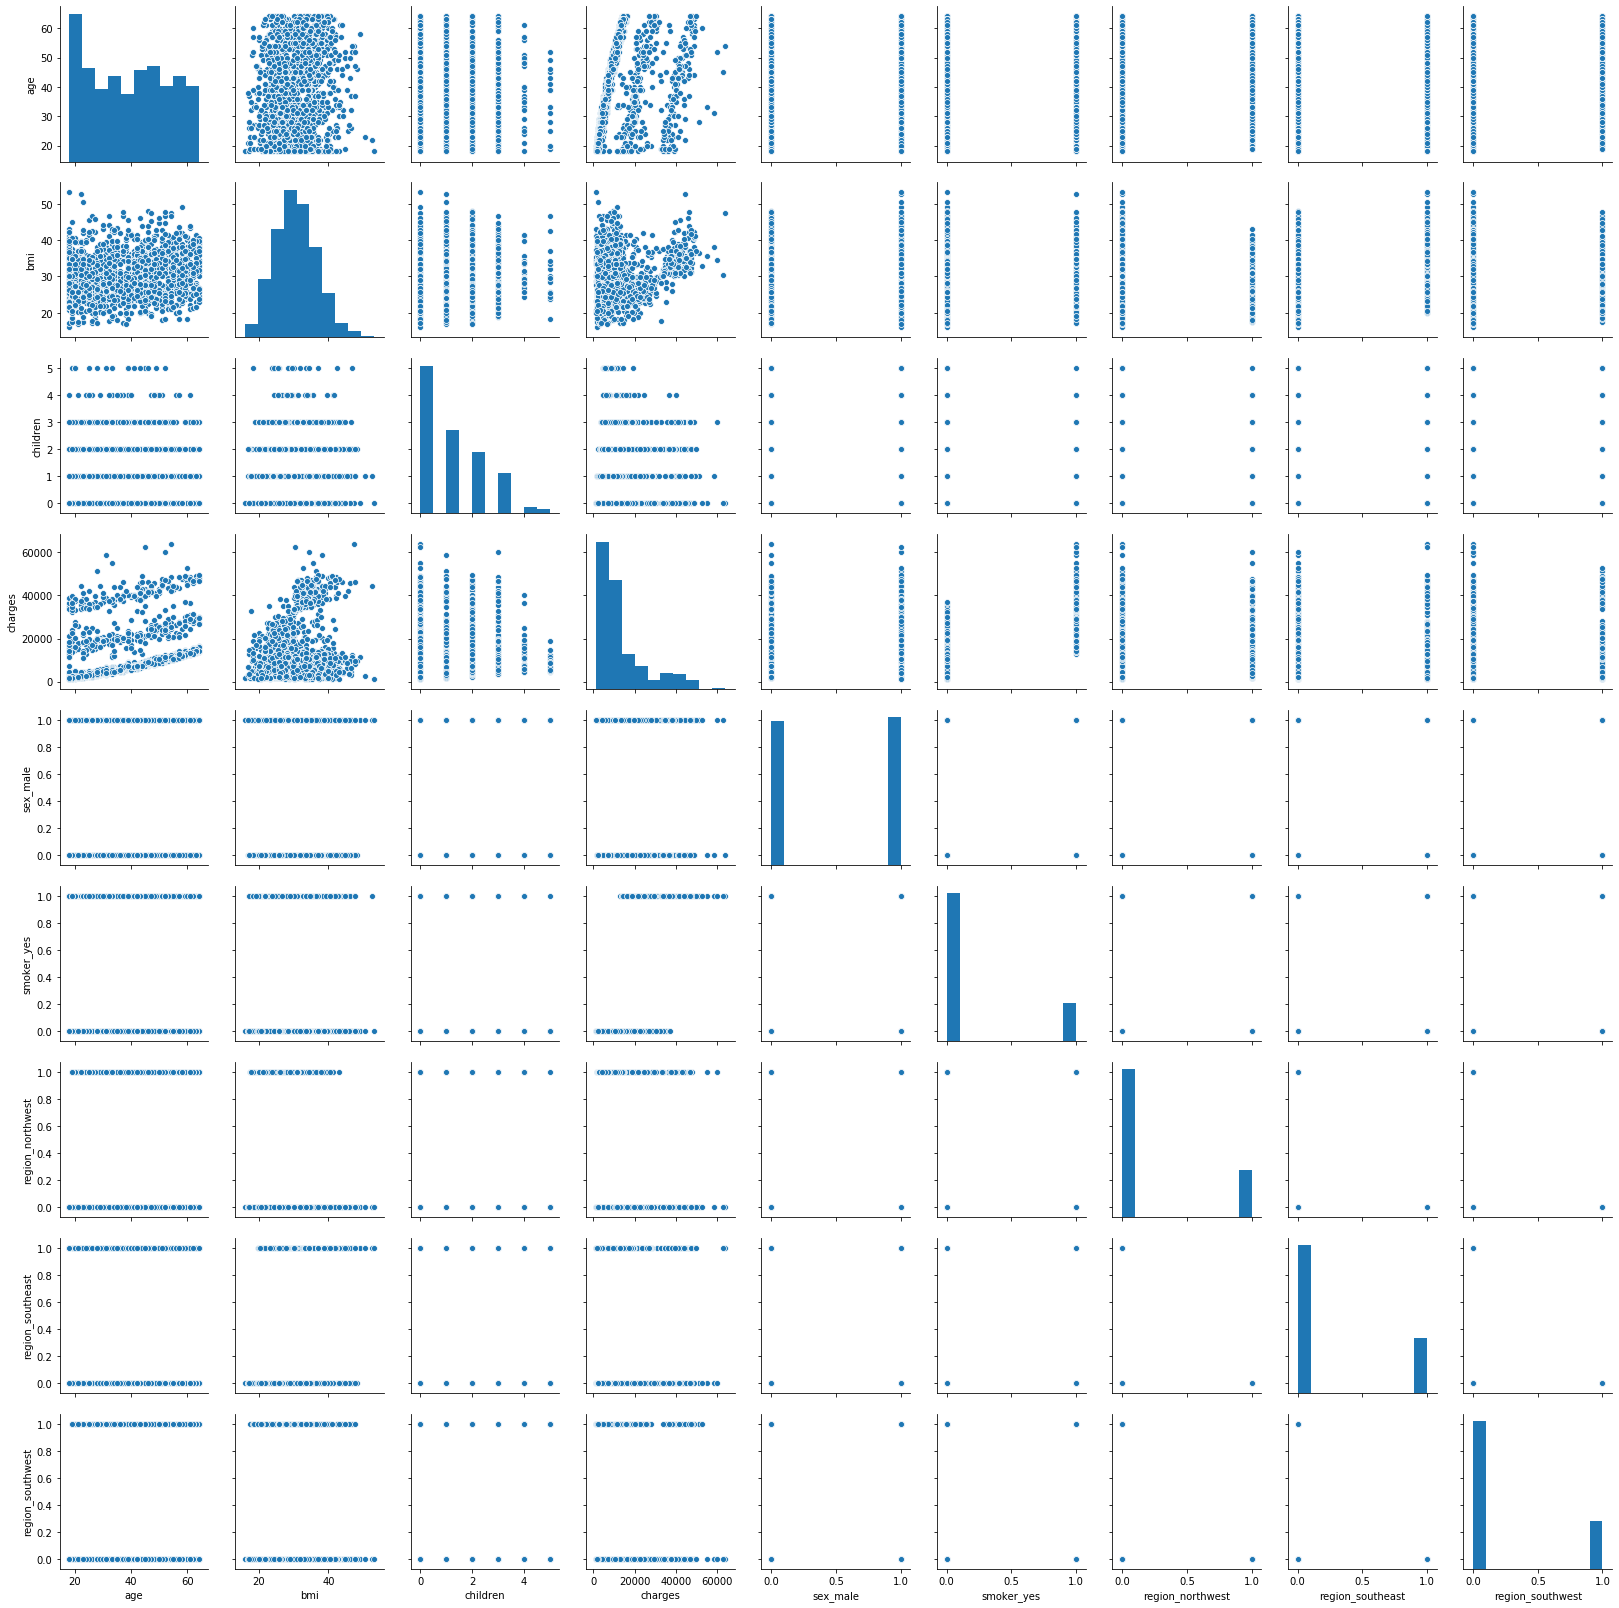

In [17]:
sns.pairplot(data=df)

#### No multicollinearity seen between independent variables.

In [18]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0, 0, 'non smokers'), Text(0, 0, 'smokers')]

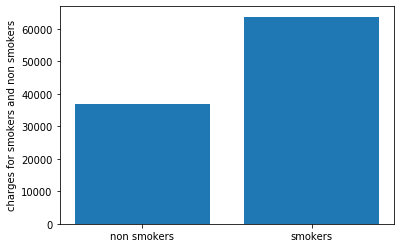

In [11]:
fig, a1=plt.subplots(1,1, figsize=(6,4))
labels=['non smokers','smokers']
plt.bar(df.smoker_yes, df.charges)
plt.ylabel('charges for smokers and non smokers')
a1.set_xticks(np.array([0,1]))
a1.set_xticklabels(labels)

#### Inference: The smokers insurnace cost is higher than that of non smokers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0, 0, 'non smokers'), Text(0, 0, 'smokers')]

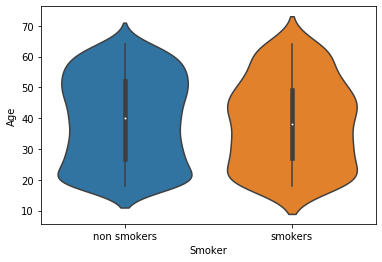

In [12]:
df.rename(columns={'smoker_yes':'Smoker'}, inplace=True)
fig, a1=plt.subplots(1,1, figsize=(6,4))
labels=['non smokers','smokers']
sns.violinplot(df.Smoker, df.age)
plt.ylabel('Age')
a1.set_xticks(np.array([0,1]))
a1.set_xticklabels(labels)


#### Inference: We can see many teenagers and mid age people smoker

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[Text(0, 0, 'non smokers'), Text(0, 0, 'smokers')]

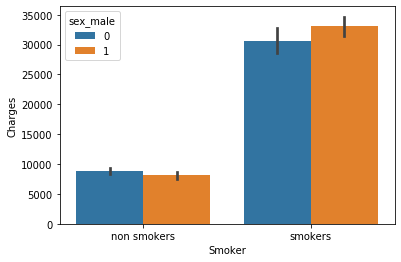

In [22]:
#Renaming smokers_yes column
df.rename(columns={'smoker_yes':'Smoker'}, inplace=True)

#Ploting for smokers and gender and charges
fig, a1=plt.subplots(1,1, figsize=(6,4))
labels=['non smokers','smokers']
sns.barplot(df.Smoker, df.charges, hue=df.sex_male)
plt.ylabel('Charges')
a1.set_xticks(np.array([0,1]))
a1.set_xticklabels(labels)


### Inference: Both male and female smoker to non smokers ratio is equal and both the genders smokers equally spend high on insurance.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

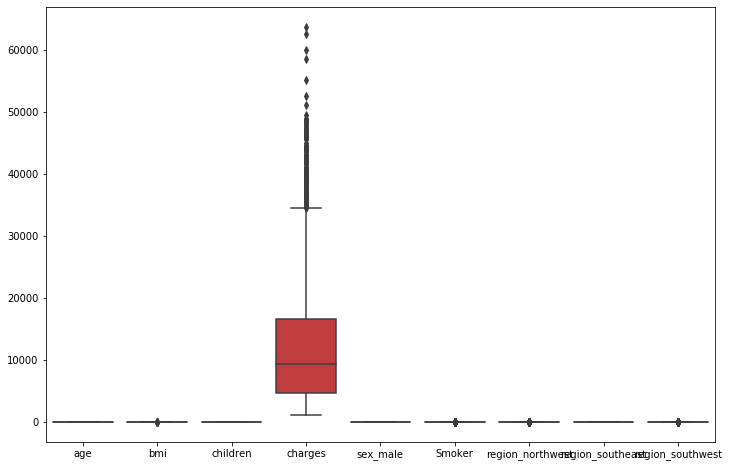

In [57]:
plt.subplots(figsize=(12,8))
sns.boxplot(data=df)

### Inference: We can see outliers in charges which is target column, hence not affective. BMI has a few outliers but not so related with target variable. 

<IPython.core.display.Javascript object>

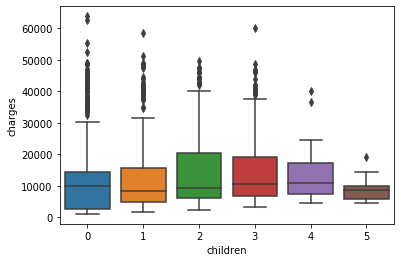

In [25]:
sns.boxplot(df.children, df.charges)

#### Inference: The means of dependents/childerns vary and definitely not linear. We must tune our regression model to get good results.

# Lets build the model and evaluate further

In [27]:
from sklearn.model_selection import train_test_split
x=df.drop('charges',1)
y=df.charges
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=.2, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
print('R2 score:', r2_score(y_test, lr.predict(X_test)))
print('RMSE :', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

R2 score: 0.7999876970680433


<IPython.core.display.Javascript object>

RMSE : 5641.62655885019


### Inference: Getting pretty good accuracy, 79.9~80% for a basic model. Lets check OLS model to vie coeffients and pearsons value for the variables.

In [29]:
import statsmodels.api as sm
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:47:14   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
Smoker            2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference: We can see sex , northwest and southwest features having p value more than .05 which is more than error rate. Let's drop those varaibles thorugh backward elimination and check our results.

In [30]:
#Feature Selection by Recursive Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x = x[cols]
    xc = sm.add_constant(x)
    model = sm.OLS(y,xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['age', 'bmi', 'children', 'Smoker']


In [36]:
#With the fatures selected from backward elimination, lets build regression model
x_eliminated=x[['age', 'bmi', 'children', 'Smoker']]
X_train,X_test,y_train,y_test=train_test_split(x_eliminated,y, test_size=.2, random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
print('R2 score:', r2_score(y_test, lr.predict(X_test)))
print('RMSE :', np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))

R2 score: 0.7978274606303823


<IPython.core.display.Javascript object>

RMSE : 5672.010981341249


### Inference: As we are using non linear features with target, linear regressor is giving poor results inspite of eliminating the features with large p values. Let's work with polynomial regressor to build a good predictive model.

In [44]:
from sklearn.preprocessing import PolynomialFeatures

#Grouping non linear features to raise degree.
x_nonlinear=x[['age', 'bmi', 'children','Smoker']]

#Genearting polynomial features and loading it as a dataframe
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x_nonlinear)

X_train,X_test,y_train,y_test = train_test_split(x_quad,y, random_state = 0)

lr_pol = LinearRegression()
lr_pol.fit(X_train,y_train)

print('R2 score:', r2_score(y_test,lr_pol.predict(X_test)))
print('RMSE :', np.sqrt(mean_squared_error(y_test, lr_pol.predict(X_test))))

R2 score: 0.8849604493599119


<IPython.core.display.Javascript object>

RMSE : 4255.725038895034


### Inference: As expected, we have 88.41% as accuracy with 4255 rmse value. This model has better predictive ability.                                                                                                                                                                                                                                                                                                                                                         Let's analyse with bias and variance error by using cross val score to get even better results via ensemble techniques.

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [47]:
GB_bias=[]
GB_ve=[]
for n in np.arange(1,100):
  GB=GradientBoostingRegressor(n_estimators=n,random_state=0)
  scores=cross_val_score(GB,x_quad,y,cv=3,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(scores))
  GB_bias.append(np.mean(rmse))
  GB_ve.append((np.std(rmse,ddof=1)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

49

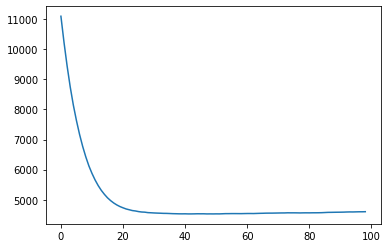

In [68]:
x_axis=np.arange(len(GB_bias))
plt.plot(x_axis,GB_bias)
np.argmin(GB_bias)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x_quad,y, random_state = 0)
GB=GradientBoostingRegressor(n_estimators=50,random_state=0)
GB.fit(X_train,y_train)

print('R2 score:', r2_score(y_test,GB.predict(X_test)))
print('RMSE :', np.sqrt(mean_squared_error(y_test, GB.predict(X_test))))

R2 score: 0.8953522328629845


<IPython.core.display.Javascript object>

RMSE : 4058.9617186967844


In [80]:
print('variance error:',GB_ve[50],'and bias error:', GB_bias[50])

variance error: 274.6186782549908 and bias error: 4530.82984443471


## As expected , Gradient Boosting regressor reduced bias error and predicted with ~90% accuracy. Boosting used 50 decision trees to provide this accuracy. Model predicts on an averge of 4530 dollars differing from actual value as insurance cost with 274.61 dollars (positive or negative) variation.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'insurance charges')

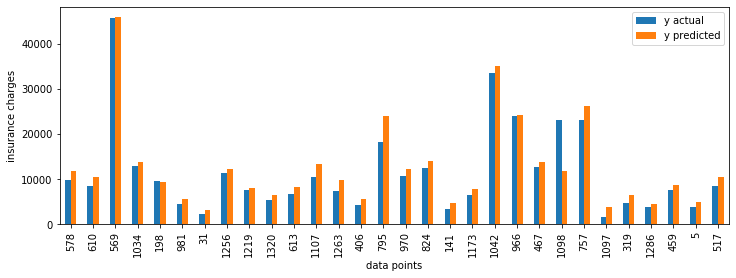

In [94]:
result=pd.DataFrame({'y actual':y_test, 'y predicted': GB.predict(X_test)})
insurance=result.head(30)
insurance.plot(kind='bar',figsize=(12,4))
plt.xlabel('data points')
plt.ylabel('insurance charges')